Data shape: (20374, 147)
Columns:
 ['qmof_id', 'name', 'info.formula', 'info.formula_reduced', 'info.mofid.mofid', 'info.mofid.mofkey', 'info.mofid.smiles_nodes', 'info.mofid.smiles_linkers', 'info.mofid.smiles', 'info.mofid.topology', 'info.natoms', 'info.pld', 'info.lcd', 'info.density', 'info.volume', 'info.symmetry.spacegroup', 'info.symmetry.spacegroup_number', 'info.symmetry.spacegroup_crystal', 'info.symmetry.pointgroup', 'info.synthesized', 'info.source', 'info.doi', 'inputs.pbe.theory', 'inputs.pbe.pseudopotentials', 'inputs.pbe.encut', 'inputs.pbe.kpoints', 'inputs.pbe.gamma', 'inputs.pbe.spin', 'outputs.pbe.energy_total', 'outputs.pbe.energy_vdw', 'outputs.pbe.energy_elec', 'outputs.pbe.net_magmom', 'outputs.pbe.bandgap', 'outputs.pbe.cbm', 'outputs.pbe.vbm', 'outputs.pbe.directgap', 'outputs.pbe.bandgap_spins', 'outputs.pbe.cbm_spins', 'outputs.pbe.vbm_spins', 'outputs.pbe.directgap_spins', 'inputs.hle17.theory', 'inputs.hle17.pseudopotentials', 'inputs.hle17.encut', 'input

/var/folders/q3/jc352zg56xq9jch5887blrx00000gn/T/ipykernel_83601/2171375555.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=to_drop.values, y=to_drop.index, palette="viridis")


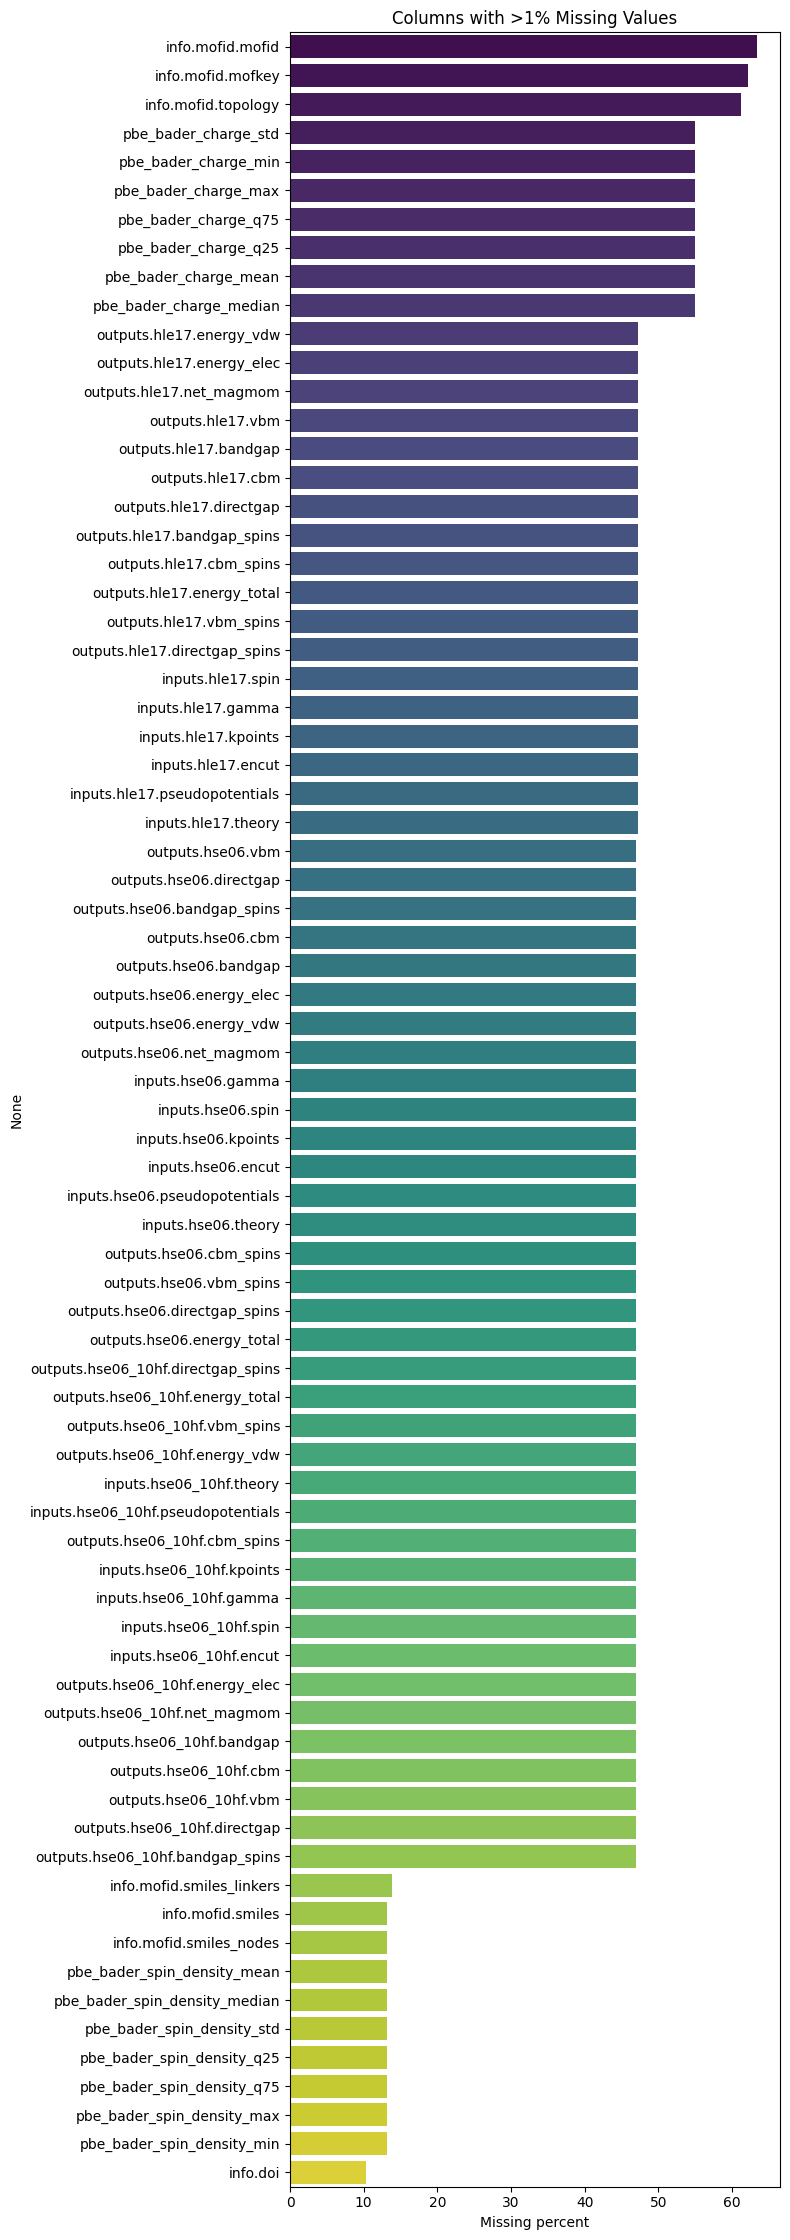

Target column: outputs.hse06.bandgap
  Missing: 9563
  Min / Max / Mean: 0.007852 8.181944 3.8574326339839047 



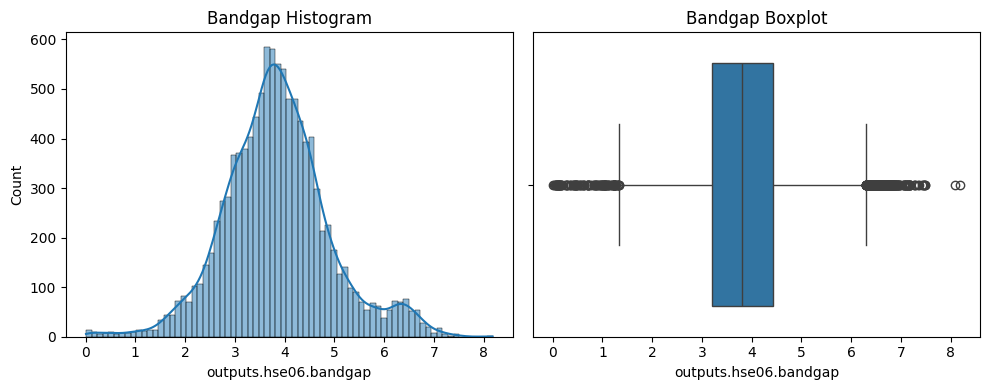

Top 10 levels for info.symmetry.spacegroup:
 info.symmetry.spacegroup
P-1           6196
P2_1/c        3958
P1            2759
C2/c          2359
P2_1           508
P2_12_12_1     399
Cc             307
C2             304
C2/m           256
P2/c           250
Name: count, dtype: int64 



/var/folders/q3/jc352zg56xq9jch5887blrx00000gn/T/ipykernel_83601/2171375555.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df,


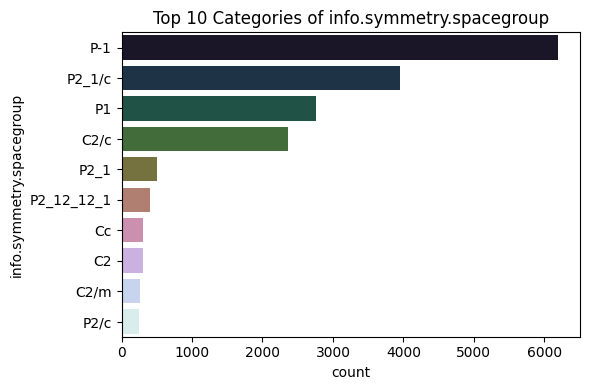

Top 10 levels for info.symmetry.pointgroup:
 info.symmetry.pointgroup
2/m    6947
-1     6197
1      2759
2       877
mmm     728
222     560
m       478
mm2     446
-3      209
422     139
Name: count, dtype: int64 



/var/folders/q3/jc352zg56xq9jch5887blrx00000gn/T/ipykernel_83601/2171375555.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df,


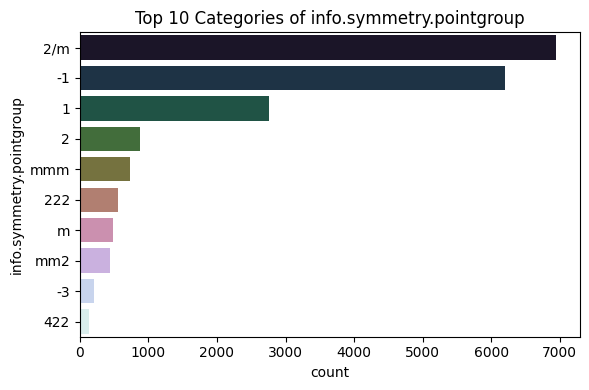

Numeric columns under EDA: ['info.density', 'info.pld', 'info.volume', 'num_atoms', 'pbe_ddec_charge_mean', 'pbe_cm5_charge_mean', 'pbe_bader_charge_mean', 'pbe_ddec_spin_density_mean', 'pbe_bader_spin_density_mean', 'pbe_magmom_mean'] 

info.density              skewness = +0.249


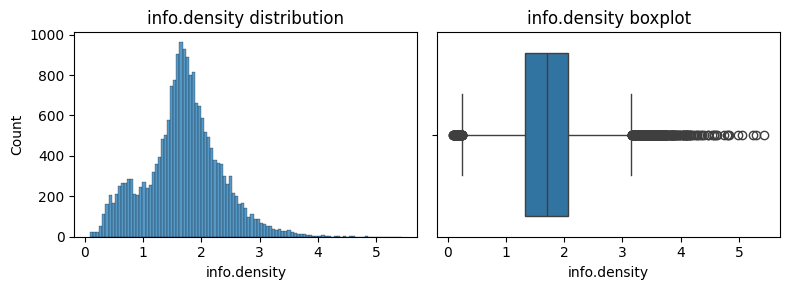

info.pld                  skewness = +3.148


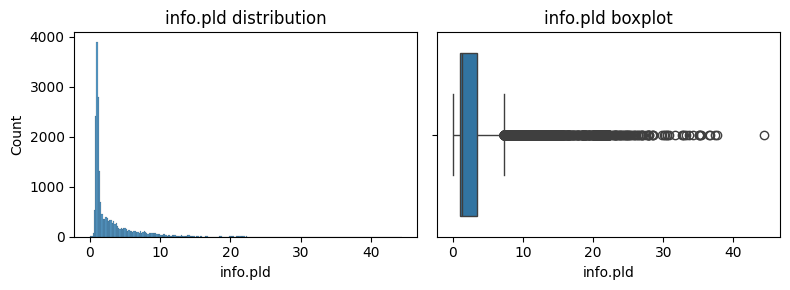

info.volume               skewness = +6.489


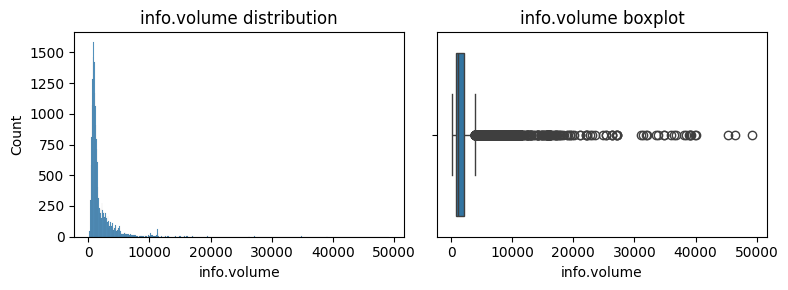

num_atoms                 skewness = +1.958


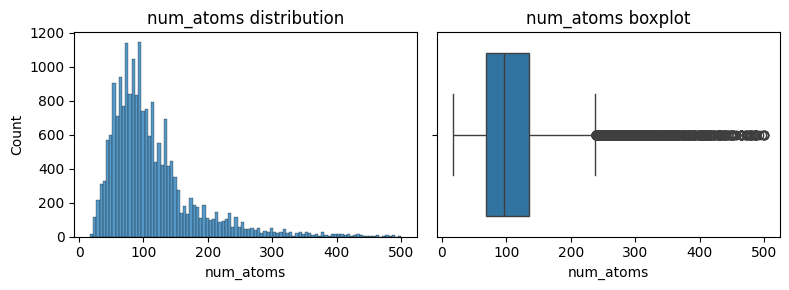

pbe_ddec_charge_mean      skewness = +0.000


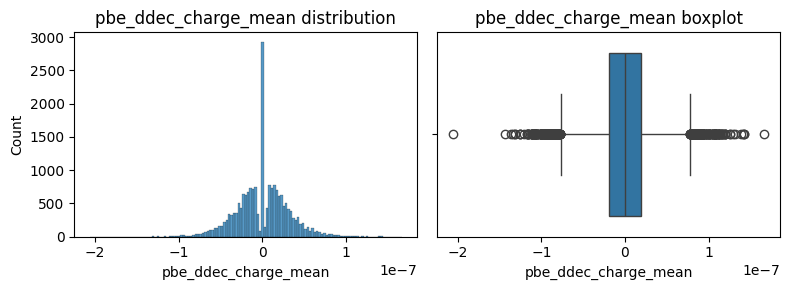

pbe_cm5_charge_mean       skewness = +0.000


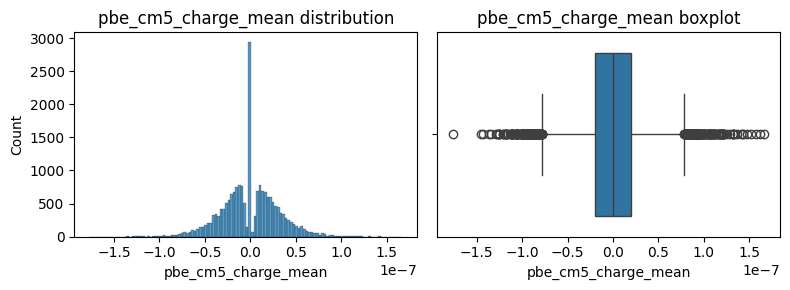

pbe_bader_charge_mean     skewness = +0.000


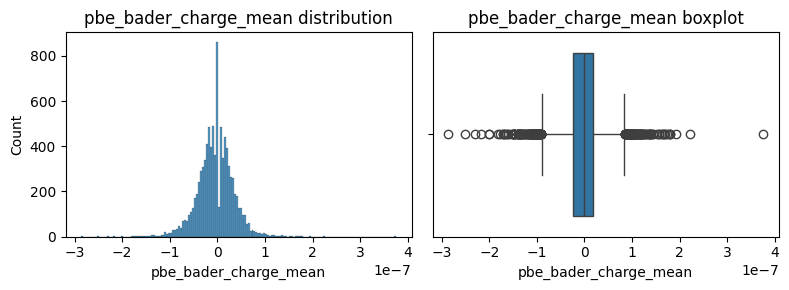

pbe_ddec_spin_density_mean skewness = +5.292


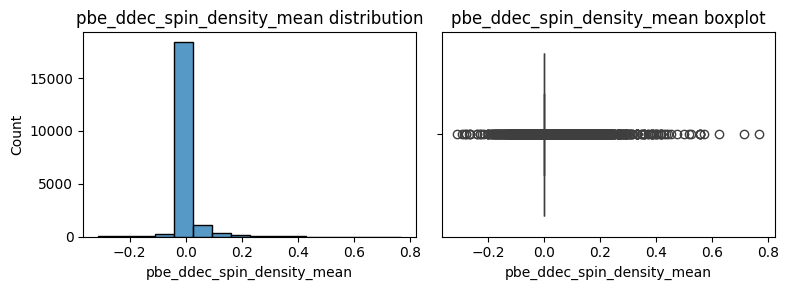

pbe_bader_spin_density_mean skewness = +7.502


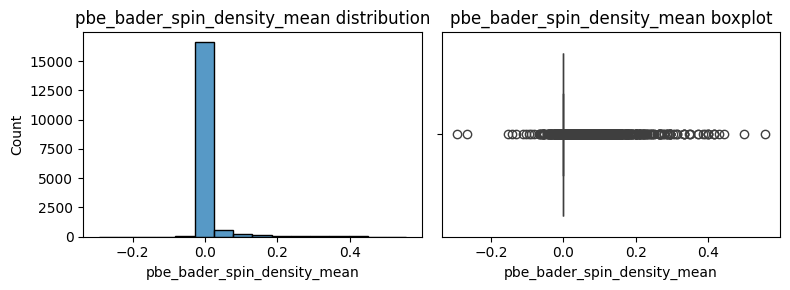

pbe_magmom_mean           skewness = +5.231


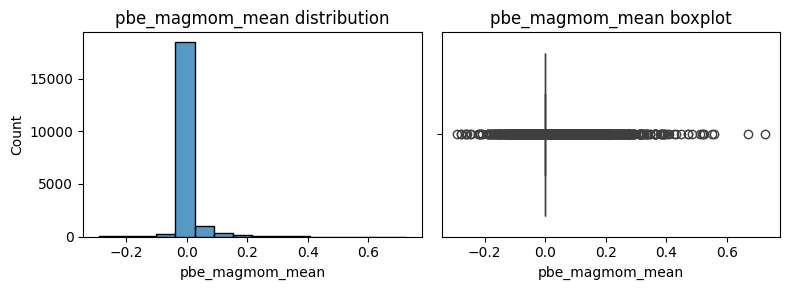

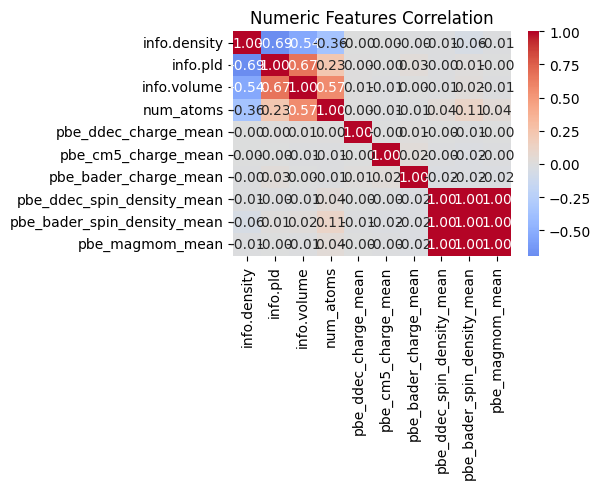

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ───────────────────────────────────────────────────────────────────────────────
# 1) Load data
# ───────────────────────────────────────────────────────────────────────────────
df = pd.read_csv("qmof_with_dft_aggregates.csv", low_memory=False)
print(f"Data shape: {df.shape}")
print("Columns:\n", df.columns.tolist(), "\n")

# ───────────────────────────────────────────────────────────────────────────────
# 2) Missing‐value analysis
# ───────────────────────────────────────────────────────────────────────────────
missing_frac = df.isna().mean() * 100
to_drop     = missing_frac[missing_frac > 1].sort_values(ascending=False)

print(f"Columns with >1% missing ({len(to_drop)} total):\n")
for col, pct in to_drop.items():
    print(f"  {col:40s} {pct:6.2f}%")

plt.figure(figsize=(8, max(4, 0.3*len(to_drop))))
sns.barplot(x=to_drop.values, y=to_drop.index, palette="viridis")
plt.xlabel("Missing percent")
plt.title("Columns with >1% Missing Values")
plt.tight_layout()
plt.show()

# ───────────────────────────────────────────────────────────────────────────────
# 3) Target (bandgap) analysis
# ───────────────────────────────────────────────────────────────────────────────
TARGET = "outputs.hse06.bandgap"
print("Target column:", TARGET)
print("  Missing:", df[TARGET].isna().sum())
print("  Min / Max / Mean:", df[TARGET].min(), df[TARGET].max(), df[TARGET].mean(), "\n")

fig, axes = plt.subplots(1,2, figsize=(10,4))
sns.histplot(df[TARGET].dropna(), kde=True, ax=axes[0]).set(title="Bandgap Histogram")
sns.boxplot(x=df[TARGET], ax=axes[1]).set(title="Bandgap Boxplot")
plt.tight_layout()
plt.show()

# ───────────────────────────────────────────────────────────────────────────────
# 4) Categorical EDA
# ───────────────────────────────────────────────────────────────────────────────
for col in ["info.symmetry.spacegroup", "info.symmetry.pointgroup"]:
    if col in df.columns:
        print(f"Top 10 levels for {col}:\n", df[col].value_counts().head(10), "\n")
        plt.figure(figsize=(6,4))
        sns.countplot(y=col, data=df,
                      order=df[col].value_counts().head(10).index,
                      palette="cubehelix")
        plt.title(f"Top 10 Categories of {col}")
        plt.tight_layout()
        plt.show()

# ───────────────────────────────────────────────────────────────────────────────
# 5) Numeric‐feature EDA
# ───────────────────────────────────────────────────────────────────────────────
# core numerics
NUM_COLS = ["info.density","info.pld","info.volume","num_atoms"]
# plus any DFT‐aggregate mean columns
NUM_COLS += [c for c in df.columns if c.endswith("_mean")]

# drop cols that aren't present
NUM_COLS = [c for c in NUM_COLS if c in df.columns]

print("Numeric columns under EDA:", NUM_COLS, "\n")

# distribution, boxplot, skew
for col in NUM_COLS:
    series = df[col].dropna()
    sk = series.skew()
    print(f"{col:25s} skewness = {sk:+.3f}")
    fig, axes = plt.subplots(1,2, figsize=(8,3))
    sns.histplot(series, kde=False, ax=axes[0]).set(title=f"{col} distribution")
    sns.boxplot(x=series, ax=axes[1]).set(title=f"{col} boxplot")
    plt.tight_layout()
    plt.show()

# ───────────────────────────────────────────────────────────────────────────────
# 6) Correlation heatmap (numeric)
# ───────────────────────────────────────────────────────────────────────────────
if len(NUM_COLS) > 1:
    corr = df[NUM_COLS].corr()
    plt.figure(figsize=(6,5))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
    plt.title("Numeric Features Correlation")
    plt.tight_layout()
    plt.show()


In [6]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# 1) Load data
df = pd.read_csv("qmof_with_dft_aggregates.csv", low_memory=False)
TARGET = "outputs.hse06.bandgap"

# 2) Drop ultra-sparse metadata (everything under info.mofid.* except SMILES)
meta_to_drop = [c for c in df.columns 
                if c.startswith("info.mofid.") and c != "info.mofid.smiles"]
df = df.drop(columns=meta_to_drop)

# 3) Define which columns to keep
core_geo = ["info.density", "info.pld", "info.volume", "num_atoms"]
suites = [
    "pbe_ddec_charge", "pbe_cm5_charge", "pbe_bader_charge",
    "pbe_ddec_spin_density", "pbe_bader_spin_density", "pbe_magmom"
]
# pick only mean/median/std aggregates
agg_cols = [c for c in df.columns 
            if any(c.startswith(s) for s in suites)
            and any(x in c for x in ("_mean","_median","_std"))]
sym_cols   = ["info.symmetry.spacegroup", "info.symmetry.pointgroup"]
smiles_col = "info.mofid.smiles"

keep = core_geo + agg_cols + sym_cols + [smiles_col, TARGET]
df = df.loc[:, keep]

# 4) Log‐1p transform any numeric whose abs(skew) > 1
num_cols = core_geo + agg_cols
skewness = df[num_cols].skew().abs().sort_values(ascending=False)
to_log    = skewness[skewness > 1.0].index.tolist()
print("Skewed >1 → log1p on:", to_log)
for c in to_log:
    df[c] = np.log1p(df[c].clip(lower=0))

# 5) Median‐impute all numerics (including target)
imp = SimpleImputer(strategy="median")
df[num_cols + [TARGET]] = imp.fit_transform(df[num_cols + [TARGET]])

# 6) One‐hot encode the two symmetry columns
ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
ohe_arr = ohe.fit_transform(df[sym_cols])
ohe_cols = [
    f"{col}__{cat}"
    for col, cats in zip(sym_cols, ohe.categories_)
    for cat in cats
]
df_ohe = pd.DataFrame(ohe_arr, columns=ohe_cols, index=df.index)
df = df.drop(columns=sym_cols).join(df_ohe)

# 7) Drop any pair of geo features still correlating >0.9
corr = df[core_geo].corr().abs()
upper = corr.where(np.triu(np.ones(corr.shape),k=1).astype(bool))
drop_geo = [c for c in upper.columns if any(upper[c]>0.9)]
print("Dropping highly‐collinear:", drop_geo)
df = df.drop(columns=drop_geo)

# 8) Add simple interaction term
df["density_x_volume"] = df["info.density"] * df["info.volume"]

# 9) Remove outliers on the target (1.5×IQR rule)
q1, q3 = df[TARGET].quantile([0.25,0.75])
iqr = q3 - q1
low, high = q1 - 1.5*iqr, q3 + 1.5*iqr
print(f"Filtering bandgap to within [{low:.3f}, {high:.3f}]")
df = df[(df[TARGET]>=low) & (df[TARGET]<=high)]

print("Final dataframe shape:", df.shape)


Skewed >1 → log1p on: ['pbe_bader_spin_density_median', 'pbe_magmom_median', 'pbe_ddec_spin_density_median', 'pbe_bader_spin_density_mean', 'info.volume', 'pbe_bader_spin_density_std', 'pbe_ddec_spin_density_mean', 'pbe_magmom_mean', 'pbe_magmom_std', 'pbe_ddec_spin_density_std', 'info.pld', 'pbe_ddec_charge_median', 'num_atoms', 'pbe_bader_charge_median', 'pbe_cm5_charge_std']
Dropping highly‐collinear: []
Filtering bandgap to within [3.558, 4.078]
Final dataframe shape: (12139, 253)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END colsample_bytree=1.0, learning_rate=0.03, max_depth=10, n_estimators=100, reg_alpha=0.1, reg_lambda=5, subsample=0.6; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.03, max_depth=10, n_estimators=100, reg_alpha=0.1, reg_lambda=5, subsample=0.6; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.03, max_depth=10, n_estimators=100, reg_alpha=0.1, reg_lambda=5, subsample=0.6; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.03, max_depth=10, n_estimators=100, reg_alpha=0.1, reg_lambda=5, subsample=0.6; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.03, max_depth=10, n_estimators=100, reg_alpha=0.1, reg_lambda=5, subsample=0.6; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=100, reg_alpha=1, reg_lambda=5, subsample=0.6; total time=   0.8s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n

/var/folders/q3/jc352zg56xq9jch5887blrx00000gn/T/ipykernel_20927/1786883532.py:144: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top20.values, y=top20.index, palette="mako")


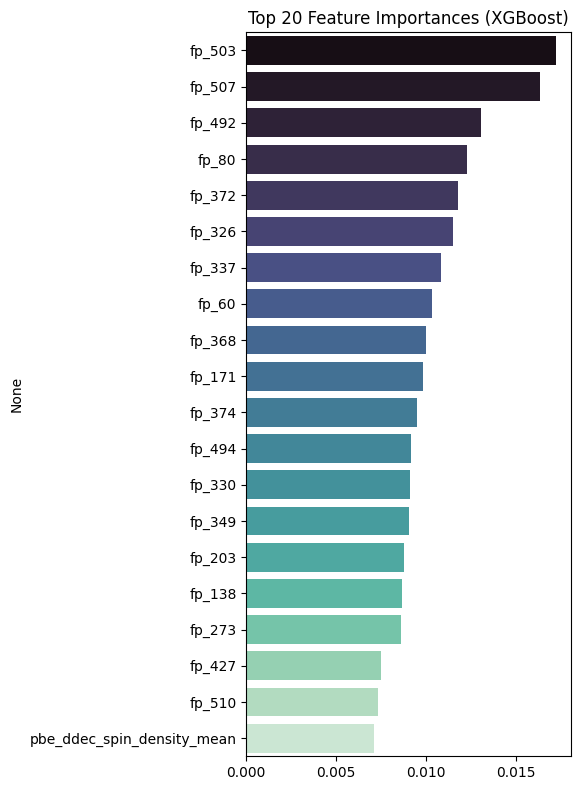

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')   # mute RDKit warnings
import matplotlib.pyplot as plt
import seaborn as sns

# ────────────────────────────────────────────────────────────────────────────
# 1) Load & filter
# ────────────────────────────────────────────────────────────────────────────
df = pd.read_csv("qmof_with_dft_aggregates.csv", low_memory=False)
TARGET = "outputs.hse06.bandgap"
df = df.dropna(subset=[TARGET]).reset_index(drop=True)

# ────────────────────────────────────────────────────────────────────────────
# 2) Feature blocks definition
# ────────────────────────────────────────────────────────────────────────────
NUM_COLS = ["info.density", "info.pld", "info.volume", "num_atoms"]
CAT_COLS = ["info.symmetry.spacegroup", "info.symmetry.pointgroup"]
SMILES_COL = "info.mofid.smiles"
# pick the DFT‐aggregate “mean” cols
dft_cols = [c for c in df.columns if any(
    p in c for p in [
        "pbe_ddec_charge", "pbe_cm5_charge", "pbe_bader_charge",
        "pbe_ddec_spin_density", "pbe_bader_spin_density", "pbe_magmom"
    ]
) and c.endswith("_mean")]

# ────────────────────────────────────────────────────────────────────────────
# 3) Prepare numeric block
# ────────────────────────────────────────────────────────────────────────────
X_num = df[NUM_COLS + dft_cols].copy()
num_imp = SimpleImputer(strategy="median")
X_num = pd.DataFrame(
    num_imp.fit_transform(X_num),
    columns=X_num.columns,
    index=df.index
)

# ────────────────────────────────────────────────────────────────────────────
# 4) Prepare categorical block (one‐hot top-10)
# ────────────────────────────────────────────────────────────────────────────
X_cat = pd.DataFrame(index=df.index)
for col in CAT_COLS:
    top10 = df[col].value_counts().nlargest(10).index
    mapped = df[col].where(df[col].isin(top10), other="Other").astype(str)
    enc = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
    arr = enc.fit_transform(mapped.to_frame())
    names = [f"{col}__{v}" for v in enc.categories_[0]]
    X_cat[names] = arr

# ────────────────────────────────────────────────────────────────────────────
# 5) Morgan fingerprints
# ────────────────────────────────────────────────────────────────────────────
def morgan_fp(smi, radius=2, nBits=512):
    mol = Chem.MolFromSmiles(smi) if isinstance(smi, str) else None
    arr = np.zeros((nBits,), dtype=int)
    if mol:
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=nBits)
        AllChem.DataStructs.ConvertToNumpyArray(fp, arr)
    return arr

fps = np.vstack(df[SMILES_COL].map(morgan_fp))
X_fp = pd.DataFrame(
    fps,
    columns=[f"fp_{i}" for i in range(fps.shape[1])],
    index=df.index
)

# ────────────────────────────────────────────────────────────────────────────
# 6) Combine all feature blocks
# ────────────────────────────────────────────────────────────────────────────
X = pd.concat([X_num, X_cat, X_fp], axis=1)
y = df[TARGET].values

# ────────────────────────────────────────────────────────────────────────────
# 7) Train/test split
# ────────────────────────────────────────────────────────────────────────────
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# ────────────────────────────────────────────────────────────────────────────
# 8) Drop any non-numeric columns before XGBoost
# ────────────────────────────────────────────────────────────────────────────
X_train = X_train.select_dtypes(include=[np.number])
X_test  = X_test.select_dtypes(include=[np.number])

# ────────────────────────────────────────────────────────────────────────────
# 9) Hyperparameter tuning with RandomizedSearchCV
# ────────────────────────────────────────────────────────────────────────────
param_dist = {
    "n_estimators": [100, 200, 400],
    "learning_rate": [0.01, 0.03, 0.1, 0.2],
    "max_depth": [4, 6, 8, 10],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "reg_alpha": [0, 0.1, 1],
    "reg_lambda": [1, 2, 5]
}

xgb = XGBRegressor(random_state=42, n_jobs=-1)
rs  = RandomizedSearchCV(
    xgb, param_dist,
    n_iter=30,
    cv=5,
    scoring="neg_mean_absolute_error",
    verbose=2,
    random_state=42
)
rs.fit(X_train, y_train)

print("Best params:", rs.best_params_)
print("CV MAE:   ", -rs.best_score_)

# ────────────────────────────────────────────────────────────────────────────
# 10) Evaluate on test set
# ────────────────────────────────────────────────────────────────────────────
best = rs.best_estimator_
y_pred = best.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print(f"Test RMSE = {rmse:.3f} eV")
print(f"Test MAE  = {mae:.3f} eV")
print(f"Test R²   = {r2:.3f}")

# ────────────────────────────────────────────────────────────────────────────
# 11) Feature importance (top 20)
# ────────────────────────────────────────────────────────────────────────────
importances = pd.Series(best.feature_importances_, index=X_train.columns)
top20 = importances.nlargest(20)

plt.figure(figsize=(6,8))
sns.barplot(x=top20.values, y=top20.index, palette="mako")
plt.title("Top 20 Feature Importances (XGBoost)")
plt.tight_layout()
plt.show()


n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 50
max_resources_: 400
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 8
n_resources: 50
Fitting 3 folds for each of 8 candidates, totalling 24 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:13:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=50, reg_alpha=0.1, reg_lambda=1, subsample=0.8; total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:13:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=50, reg_alpha=0.1, reg_lambda=1, subsample=0.8; total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:13:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=50, reg_alpha=0.1, reg_lambda=1, subsample=0.8; total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:13:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=50, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:13:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=50, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:13:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=4, n_estimators=50, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:13:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=50, reg_alpha=0.1, reg_lambda=5, subsample=1.0; total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:13:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=50, reg_alpha=0.1, reg_lambda=5, subsample=1.0; total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:13:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=50, reg_alpha=0.1, reg_lambda=5, subsample=1.0; total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:13:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=50, reg_alpha=0.1, reg_lambda=2, subsample=1.0; total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:13:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=50, reg_alpha=0.1, reg_lambda=2, subsample=1.0; total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:13:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=50, reg_alpha=0.1, reg_lambda=2, subsample=1.0; total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:13:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, n_estimators=50, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:13:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, n_estimators=50, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:13:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, n_estimators=50, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:14:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=50, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:14:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=50, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:14:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=50, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:14:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, learning_rate=0.03, max_depth=4, n_estimators=50, reg_alpha=0, reg_lambda=2, subsample=1.0; total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:14:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, learning_rate=0.03, max_depth=4, n_estimators=50, reg_alpha=0, reg_lambda=2, subsample=1.0; total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:14:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, learning_rate=0.03, max_depth=4, n_estimators=50, reg_alpha=0, reg_lambda=2, subsample=1.0; total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:14:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, n_estimators=50, reg_alpha=1, reg_lambda=5, subsample=0.8; total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:14:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, n_estimators=50, reg_alpha=1, reg_lambda=5, subsample=0.8; total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:14:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, n_estimators=50, reg_alpha=1, reg_lambda=5, subsample=0.8; total time=   0.3s
----------
iter: 1
n_candidates: 3
n_resources: 150
Fitting 3 folds for each of 3 candidates, totalling 9 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:14:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=150, reg_alpha=0.1, reg_lambda=1, subsample=0.8; total time=   0.7s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:14:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=150, reg_alpha=0.1, reg_lambda=1, subsample=0.8; total time=   0.7s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:14:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=150, reg_alpha=0.1, reg_lambda=1, subsample=0.8; total time=   0.6s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:14:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=150, reg_alpha=0.1, reg_lambda=5, subsample=1.0; total time=   0.6s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:14:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=150, reg_alpha=0.1, reg_lambda=5, subsample=1.0; total time=   0.6s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:14:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=150, reg_alpha=0.1, reg_lambda=5, subsample=1.0; total time=   0.6s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:14:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.6s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:14:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.7s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:14:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=150, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.6s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:14:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- Halving Search Results ---
Best parameters: {'subsample': 1.0, 'reg_lambda': 5, 'reg_alpha': 0.1, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 0.8, 'n_estimators': 150}
CV MAE:          0.5089432852154151

Test RMSE = 0.684 eV
Test MAE  = 0.496 eV
Test R²   = 0.584


/var/folders/q3/jc352zg56xq9jch5887blrx00000gn/T/ipykernel_20927/3877341062.py:161: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top20.values, y=top20.index, palette="mako")


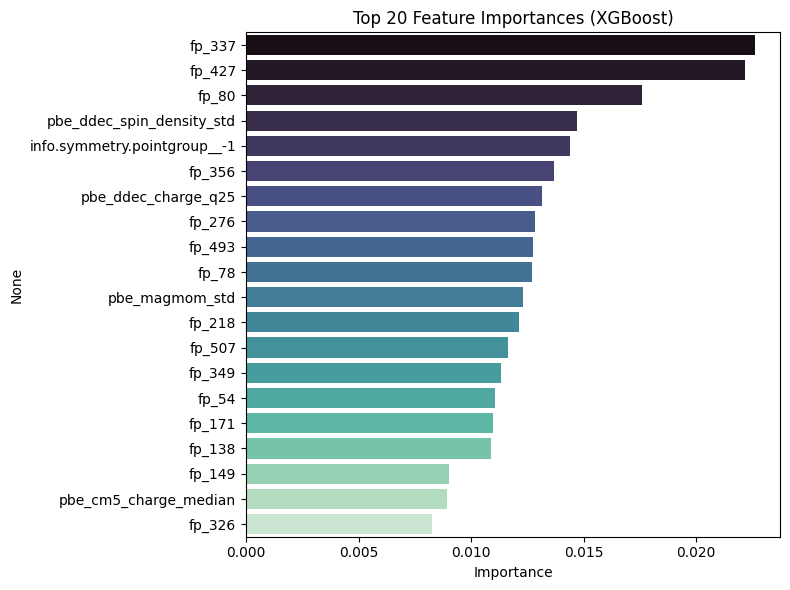

In [19]:
import pandas as pd
import numpy as np

from sklearn.model_selection    import train_test_split
from sklearn.impute             import SimpleImputer
from sklearn.preprocessing      import OneHotEncoder
from sklearn.experimental       import enable_halving_search_cv  # noqa
from sklearn.model_selection    import HalvingRandomSearchCV
from sklearn.metrics            import mean_absolute_error, mean_squared_error, r2_score

from xgboost                    import XGBRegressor

from rdkit import Chem, RDLogger
from rdkit.Chem import AllChem, DataStructs

# ────────────────────────────────────────────────────
# Silence RDKit warnings
# ────────────────────────────────────────────────────
RDLogger.DisableLog('rdApp.*')


# 1) Load & keep only non-zero, non-null target

df = pd.read_csv("qmof_with_dft_aggregates.csv", low_memory=False)
TARGET = "outputs.hse06.bandgap"

df = df.dropna(subset=[TARGET])
df = df[df[TARGET] != 0].reset_index(drop=True)


# 2) Define feature blocks

geo_cols   = ["info.density", "info.pld", "info.volume", "num_atoms"]
agg_cols   = [
    c for c in df.columns
    if any(pref in c for pref in (
        "pbe_ddec_charge", "pbe_cm5_charge", "pbe_bader_charge",
        "pbe_ddec_spin_density", "pbe_bader_spin_density", "pbe_magmom"
    ))
    and c.rsplit("_",1)[-1] in {"mean", "median", "std", "q25", "q75"}
]
sym_cols   = ["info.symmetry.spacegroup", "info.symmetry.pointgroup"]
SMILES_COL = "info.mofid.smiles"

assert SMILES_COL in df.columns, f"Could not find SMILES column '{SMILES_COL}'"


# 3) Numeric block → median impute

X_num = df[geo_cols + agg_cols].copy()
X_num[:] = SimpleImputer(strategy="median").fit_transform(X_num)


# 4) Categorical block → top‐10 one‐hot (use sparse_output=False)

X_cat = pd.DataFrame(index=df.index)
for c in sym_cols:
    top10  = df[c].value_counts().nlargest(10).index
    mapped = df[c].where(df[c].isin(top10), other="Other").astype(str)
    enc    = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
    arr    = enc.fit_transform(mapped.values.reshape(-1, 1))
    names  = [f"{c}__{cat}" for cat in enc.categories_[0]]
    X_cat[names] = arr

# Morgan fingerprint block (512-bit)

def morgan_fp(smi, radius=2, nBits=512):
    arr = np.zeros((nBits,), dtype=int)
    mol = Chem.MolFromSmiles(smi) if isinstance(smi, str) else None
    if mol:
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=nBits)
        DataStructs.ConvertToNumpyArray(fp, arr)
    return arr

fps = np.stack(df[SMILES_COL].map(morgan_fp))
X_fp = pd.DataFrame(
    fps,
    columns=[f"fp_{i}" for i in range(fps.shape[1])],
    index=df.index
)


# 6) Combine all and extract y

X = pd.concat([X_num, X_cat, X_fp], axis=1)
y = df[TARGET].values


# 7) Train/test split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)


# 8) HalvingRandomSearchCV tuning
#     - use 'n_estimators' as the resource

param_dist = {
    "learning_rate":    [0.01, 0.03, 0.1],
    "max_depth":        [4, 6, 8],
    "subsample":        [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0],
    "reg_alpha":        [0, 0.1, 1],
    "reg_lambda":       [1, 2, 5],
}

base = XGBRegressor(
    tree_method="hist",
    predictor="cpu_predictor",
    n_jobs=-1,
    random_state=42
)

halving = HalvingRandomSearchCV(
    estimator           = base,
    param_distributions = param_dist,
    resource            = "n_estimators",
    min_resources       = 50,
    max_resources       = 400,
    factor              = 3,
    cv                  = 3,
    scoring             = "neg_mean_absolute_error",
    verbose             = 2,
    random_state        = 42
)

halving.fit(X_train, y_train)

print("\n--- Halving Search Results ---")
print("Best parameters:", halving.best_params_)
print("CV MAE:         ", -halving.best_score_)


# 9) Final evaluation on test set

best_model = halving.best_estimator_
y_pred     = best_model.predict(X_test)

# compute RMSE by sqrt of MSE
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print(f"\nTest RMSE = {rmse:.3f} eV")
print(f"Test MAE  = {mae:.3f} eV")
print(f"Test R²   = {r2:.3f}")


# 10) Plot top-20 feature importances

import matplotlib.pyplot as plt
import seaborn as sns

importances = pd.Series(best_model.feature_importances_, index=X.columns)
top20       = importances.nlargest(20)

plt.figure(figsize=(8, 6))
sns.barplot(x=top20.values, y=top20.index, palette="mako")
plt.title("Top 20 Feature Importances (XGBoost)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


In [20]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder


# Assumptions: you have already done “Step 1 (column pruning)” and have:
#   df         – my DataFrame
#   core_geo   – list of geometry cols, e.g. ["info.density","info.pld","info.volume","num_atoms"]
#   agg_cols   – list of DFT‐aggregate mean/median/std/q25/q75 cols
#   sym_cols   – ["info.symmetry.spacegroup","info.symmetry.pointgroup"]
#   SMILES_COL – "info.mofid.smiles"
#   TARGET     – "outputs.hse06.bandgap"
# And you have df = df[ core_geo + agg_cols + sym_cols + [SMILES_COL, TARGET] ].copy()


# 2) TRANSFORMATIONS: log1p all numeric features with |skew| > 1
num_cols = core_geo + agg_cols

# compute initial skew
skew_init = df[num_cols].skew().sort_values(ascending=False)
skewed     = skew_init[abs(skew_init) > 1].index.tolist()
print("Features with |skew|>1 before log1p:\n", skewed, "\n")

# apply log1p
for c in skewed:
    df[c] = np.log1p(df[c].clip(lower=0))

# re‐check skew
skew_after = df[skewed].skew().sort_values(ascending=False)
print("Skewness after log1p:\n", skew_after, "\n")


# 3) IMPUTATION & ENCODING

# 3a) Numeric ‒ median
imp = SimpleImputer(strategy="median")
df[num_cols] = imp.fit_transform(df[num_cols])

# 3b) Categorical (symmetry) ‒ top10 one‐hot, rest→"Other"
ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
for col in sym_cols:
    top10      = df[col].value_counts().nlargest(10).index
    df[col]    = df[col].where(df[col].isin(top10), "Other").astype(str)

ohe_arr     = ohe.fit_transform(df[sym_cols])
ohe_cols    = [
    f"{col}__{cat}"
    for col, cats in zip(sym_cols, ohe.categories_)
    for cat in cats
]
df_ohe      = pd.DataFrame(ohe_arr, columns=ohe_cols, index=df.index)

# drop original symmetry cols & append one‐hot
df.drop(columns=sym_cols, inplace=True)
df = pd.concat([df, df_ohe], axis=1)


# 4) FEATURE REDUCTION & INTERACTIONS

# 4a) Drop highly‐collinear numeric features (|corr|>0.90)
corr     = df[num_cols].corr().abs()
upper    = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
to_drop  = [c for c in upper.columns if any(upper[c] > 0.90)]
print("Dropping because highly collinear:\n", to_drop, "\n")
df.drop(columns=to_drop, inplace=True)

# update num_cols
num_cols = [c for c in num_cols if c not in to_drop]

# 4b) Simple interaction terms creation
df["density_x_volume"] = df["info.density"] * df["info.volume"]

# 4c) Outlier removal on TARGET (1.5×IQR rule)
Q1  = df[TARGET].quantile(0.25)
Q3  = df[TARGET].quantile(0.75)
IQR = Q3 - Q1
low = Q1 - 1.5 * IQR
high= Q3 + 1.5 * IQR
df  = df[(df[TARGET] >= low) & (df[TARGET] <= high)].reset_index(drop=True)

print("Final shape after Steps 2–4:", df.shape)


Features with |skew|>1 before log1p:
 ['pbe_bader_spin_density_median', 'pbe_bader_spin_density_q75', 'pbe_magmom_median', 'pbe_ddec_spin_density_median', 'pbe_bader_spin_density_mean', 'pbe_bader_spin_density_std', 'pbe_magmom_q75', 'pbe_ddec_spin_density_q75', 'pbe_ddec_spin_density_mean', 'pbe_magmom_mean', 'info.pld', 'pbe_magmom_std', 'pbe_ddec_spin_density_std', 'pbe_cm5_charge_q75', 'pbe_ddec_charge_q75', 'pbe_cm5_charge_std', 'info.density', 'pbe_bader_charge_q75', 'pbe_ddec_charge_q25', 'pbe_bader_charge_q25', 'pbe_cm5_charge_median', 'pbe_ddec_charge_median', 'pbe_bader_charge_median', 'pbe_ddec_spin_density_q25', 'pbe_magmom_q25', 'pbe_bader_spin_density_q25'] 

Skewness after log1p:
 pbe_ddec_charge_q25              63.635219
pbe_ddec_spin_density_q25        51.040517
pbe_bader_spin_density_q25       50.470990
pbe_bader_spin_density_median    49.459341
pbe_magmom_q25                   39.480925
pbe_bader_spin_density_q75       27.562631
pbe_magmom_median                24.5

In [23]:
import pandas as pd
import numpy as np

from sklearn.impute            import SimpleImputer
from sklearn.preprocessing     import PowerTransformer, StandardScaler, OneHotEncoder
from sklearn.model_selection   import train_test_split
from sklearn.metrics           import mean_squared_error, mean_absolute_error, r2_score

from xgboost                   import XGBRegressor

from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')   # silence RDKit warnings


# 1) LOAD + DROP SPARSE METADATA (>1% missing, but KEEP SMILES) + DROP ZERO/NAN TARGET

df = pd.read_csv("qmof_with_dft_aggregates.csv", low_memory=False)
TARGET    = "outputs.hse06.bandgap"
SMILES_COL = "info.mofid.smiles"

# 1a) drop missing/zero targets
df = df.dropna(subset=[TARGET])
df = df[df[TARGET] != 0].reset_index(drop=True)

# 1b) identify ultra-sparse cols (>1% missing), except keep SMILES
missing_frac = df.isna().mean()
drop_cols    = [
    c for c, f in missing_frac.items() 
    if f > 0.01 and c != SMILES_COL
]
print(f"Dropping {len(drop_cols)} ultra-sparse columns (>1% missing):\n  {drop_cols}\n")
df.drop(columns=drop_cols, inplace=True)


# 2) DEFINE FEATURE BLOCKS

geo_cols = ["info.density","info.pld","info.volume","num_atoms"]

agg_prefixes = (
    "pbe_ddec_charge","pbe_cm5_charge","pbe_bader_charge",
    "pbe_ddec_spin_density","pbe_bader_spin_density","pbe_magmom"
)
agg_cols = [
    c for c in df.columns
    if any(c.startswith(pref) for pref in agg_prefixes)
       and c.split("_")[-1] in {"mean","median","std","q25","q75"}
]

sym_cols = ["info.symmetry.spacegroup","info.symmetry.pointgroup"]

required = geo_cols + agg_cols + sym_cols + [SMILES_COL, TARGET]
missing  = [c for c in required if c not in df.columns]
if missing:
    raise KeyError(f"Required columns missing: {missing}")

print("After pruning, DF shape:", df.shape, "\n")


# 3) LOG₁₊ₓ ON HEAVILY SKEWED (|skew|>1)

numeric = geo_cols + agg_cols
skew_pre = df[numeric].skew().abs()
to_log   = skew_pre[skew_pre > 1].index.tolist()
print("Log₁₊ₓ on these", len(to_log), "features:\n ", to_log, "\n")
df[to_log] = np.log1p(df[to_log])


# 4) POWER TRANSFORM (YEO–JOHNSON) ON REMAINING SKEW (|skew|>0.75)

skew_mid = df[numeric].skew().abs()
to_pow   = skew_mid[skew_mid > 0.75].index.tolist()
print("Yeo–Johnson on these", len(to_pow), "features:\n ", to_pow, "\n")
pt = PowerTransformer(method="yeo-johnson", standardize=False)
df[to_pow] = pt.fit_transform(df[to_pow])


# 5) WINSORIZATION: cap numeric at 1st/99th percentiles

for c in numeric:
    low, high = df[c].quantile([0.01, 0.99])
    df[c] = df[c].clip(lower=low, upper=high)


# 6) SCALE ALL NUMERIC → zero mean, unit var

scaler = StandardScaler()
df[numeric] = scaler.fit_transform(df[numeric])


# 7) ONE-HOT TOP-10 SYMMETRY COLUMNS

X_cat = pd.DataFrame(index=df.index)
for col in sym_cols:
    top10  = df[col].value_counts().nlargest(10).index
    mapped = df[col].where(df[col].isin(top10), other="Other").fillna("Other")
    enc    = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
    arr    = enc.fit_transform(mapped.values.reshape(-1,1))
    names  = [f"{col}__{cat}" for cat in enc.categories_[0]]
    X_cat[names] = arr
print("One-hot block shape:", X_cat.shape, "\n")


# 8) MORGAN FINGERPRINTS (512 bits)

def morgan_fp(smi, radius=2, nBits=512):
    arr = np.zeros((nBits,), dtype=int)
    mol = Chem.MolFromSmiles(smi) if isinstance(smi, str) else None
    if mol:
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=nBits)
        DataStructs.ConvertToNumpyArray(fp, arr)
    return arr

fps = np.stack(df[SMILES_COL].map(morgan_fp))
X_fp = pd.DataFrame(
    fps,
    columns=[f"fp_{i}" for i in range(fps.shape[1])],
    index=df.index
)
print("Fingerprint block shape:", X_fp.shape, "\n")


# 9) ENGINEER INTERACTION TERMS

df["dens_x_vol"]     = df["info.density"] * df["info.volume"]
df["chg_mean_x_spn"] = df["pbe_ddec_charge_mean"] * df["pbe_ddec_spin_density_mean"]


# 10) ASSEMBLE X, y & SPLIT

X = pd.concat([df[numeric], X_cat, X_fp, df[["dens_x_vol","chg_mean_x_spn"]]], axis=1)
y = df[TARGET].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)
print("Final X shape:", X.shape, "\n")


# 11) TRAIN & EVALUATE FINAL XGBRegressor

best_params = {
    "learning_rate":    0.10,
    "max_depth":        6,
    "subsample":        1.0,
    "colsample_bytree": 0.8,
    "reg_alpha":        0.1,
    "reg_lambda":       5,
    "n_estimators":     150,
    "tree_method":      "hist",
    "random_state":     42,
    "n_jobs":           -1
}

model = XGBRegressor(**best_params)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse   = np.sqrt(mean_squared_error(y_test, y_pred))  # remove squared arg
mae    = mean_absolute_error(y_test, y_pred)
r2     = r2_score(y_test, y_pred)

print(f"\nTest RMSE = {rmse:.3f} eV")
print(f"Test MAE  = {mae:.3f} eV")
print(f"Test R²   = {r2:.3f}")


Dropping 20 ultra-sparse columns (>1% missing):
  ['info.mofid.mofid', 'info.mofid.mofkey', 'info.mofid.smiles_nodes', 'info.mofid.smiles_linkers', 'info.mofid.topology', 'info.doi', 'pbe_bader_charge_mean', 'pbe_bader_charge_median', 'pbe_bader_charge_std', 'pbe_bader_charge_q25', 'pbe_bader_charge_q75', 'pbe_bader_charge_max', 'pbe_bader_charge_min', 'pbe_bader_spin_density_mean', 'pbe_bader_spin_density_median', 'pbe_bader_spin_density_std', 'pbe_bader_spin_density_q25', 'pbe_bader_spin_density_q75', 'pbe_bader_spin_density_max', 'pbe_bader_spin_density_min']

After pruning, DF shape: (10811, 127) 

Log₁₊ₓ on these 18 features:
  ['info.density', 'info.pld', 'pbe_ddec_charge_median', 'pbe_ddec_charge_q25', 'pbe_ddec_charge_q75', 'pbe_cm5_charge_median', 'pbe_cm5_charge_std', 'pbe_cm5_charge_q75', 'pbe_ddec_spin_density_mean', 'pbe_ddec_spin_density_median', 'pbe_ddec_spin_density_std', 'pbe_ddec_spin_density_q25', 'pbe_ddec_spin_density_q75', 'pbe_magmom_mean', 'pbe_magmom_median', 

In [25]:
pip install shap 

  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/b9/7b/78385eb2a1c8bdfbc099f6cada581a286d93a36bcd496f22c0d33bc6536e/shap-0.48.0-cp312-cp312-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for tqdm>=4.27.0 from https://files.pythonhosted.org/packages/d0/30/dc54f88dd4a2b5dc8a0279bdd7270e735851848b762aeb1c1184ed1f6b14/tqdm-4.67.1-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 2.7 MB/s eta 0:00:00
  Obtaining dependency information for slicer==0.0.8 from https://files.pythonhosted.org/packages/63/81/9ef641ff4e12cbcca30e54e72fb0951a2ba195d0cda0ba4100e532d929db/slicer-0.0.8-py3-none-any.whl.metadata
  Obtaining dependency information for numba>=0.54 from https://files.pythonhosted.org/packages/92/4a/fe4e3c2ecad72d88f5f8cd04e7f7cff49e718398a2fac02d2947480a00ca/numba-0.61.2-cp312-cp312-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for cloudpickle from https://files.pythonhosted.o

In [33]:
import pandas as pd
import numpy as np

from sklearn.model_selection    import train_test_split
from sklearn.experimental       import enable_halving_search_cv  # noqa
from sklearn.model_selection    import HalvingRandomSearchCV
from sklearn.metrics            import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute             import SimpleImputer
from sklearn.preprocessing      import OneHotEncoder

from xgboost import XGBRegressor

# 1) load + filter
df = pd.read_csv("qmof_with_dft_aggregates.csv", low_memory=False)
df = df.dropna(subset=["outputs.hse06.bandgap"])
df = df[df["outputs.hse06.bandgap"] != 0].reset_index(drop=True)

# 2) numeric block
geo_cols = ["info.density","info.pld","info.volume","num_atoms"]
agg_cols = [c for c in df if any(p in c for p in ("pbe_ddec_charge","pbe_cm5_charge",
               "pbe_bader_charge","pbe_ddec_spin_density","pbe_bader_spin_density","pbe_magmom"))
            and c.split("_")[-1] in {"mean","median","std","q25","q75"}]
X_num = df[geo_cols+agg_cols].copy()
X_num[:] = SimpleImputer("median").fit_transform(X_num)

# 3) categorical block
sym_cols = ["info.symmetry.spacegroup","info.symmetry.pointgroup"]
X_cat = pd.DataFrame(index=df.index)
for c in sym_cols:
    top10 = df[c].value_counts().nlargest(10).index
    mapped = df[c].where(df[c].isin(top10), "Other").astype(str)
    enc = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
    arr = enc.fit_transform(mapped.values.reshape(-1,1))
    X_cat[[f"{c}__{cat}" for cat in enc.categories_[0]]] = arr

# 4) fingerprints
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs

def morgan_fp(smi, nBits=512):
    arr = np.zeros((nBits,), int)
    mol = Chem.MolFromSmiles(smi) if isinstance(smi,str) else None
    if mol:
        fp = AllChem.GetMorganFingerprintAsBitVect(mol,2,nBits)
        DataStructs.ConvertToNumpyArray(fp, arr)
    return arr

fps = np.vstack(df["info.mofid.smiles"].map(morgan_fp))
X_fp = pd.DataFrame(fps, columns=[f"fp_{i}" for i in range(512)], index=df.index)

# 5) assemble
X = pd.concat([X_num, X_cat, X_fp], axis=1)
y = df["outputs.hse06.bandgap"].values

# 6) split
X_tr_full, X_test, y_tr_full, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_tr_full,y_tr_full,test_size=0.1,random_state=1)

# 7) halving search
base = XGBRegressor(tree_method="hist",n_jobs=-1,random_state=42,verbosity=0)

param_dist = {
  "learning_rate":    [0.01,0.03,0.1],
  "max_depth":        [4,6,8],
  "subsample":        [0.8,1.0],
  "colsample_bytree": [0.8,1.0],
  "reg_alpha":        [0,0.1,1],
  "reg_lambda":       [1,5,10],
}

halving = HalvingRandomSearchCV(
  estimator           = base,
  param_distributions = param_dist,
  resource            = "n_estimators",
  min_resources       = 50,
  max_resources       = 300,
  factor              = 4,
  cv                  = 2,
  scoring             = "neg_mean_absolute_error",
  random_state        = 42,
  n_candidates        = 50,
  n_jobs              = -1,
  verbose             = 2
)

halving.fit(
  X_train, y_train,
  eval_set            = [(X_val,y_val)],
  early_stopping_rounds = 20,
  verbose             = False
)

print("Halving best params:", halving.best_params_)

best = halving.best_estimator_

# 8) test eval
y_pred = best.predict(X_test)
print("Test RMSE:", np.sqrt(mean_squared_error(y_test,y_pred)))
print("Test MAE: ", mean_absolute_error(y_test,y_pred))
print("Test R²:  ", r2_score(y_test,y_pred))


TypeError: SimpleImputer.__init__() takes 1 positional argument but 2 were given